# <p style="background-color:steelblue;font-family:newtimeroman;font-size:140%;color:white;text-align:center;border-radius:20px 20px;"><b> Credit Score Classification - Data Cleaning for train data

In [34]:
import numpy as np

In [35]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/DSS/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/DSS/data\test.csv
/DSS/data\test_cleaned.csv
/DSS/data\test_trans.csv
/DSS/data\train.csv


# Import Libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Cleaning

In [70]:
df = pd.read_csv("/DSS/data/train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1]:
# Kiểm tra trùng lặp
def ktra_trung(df):
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("Có", num_duplicates, "trùng lặp trong tập dữ liệu.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "Đã xóa dữ liệu trùng!")
        print("Không còn hàng trùng lặp!")
    else:
        print("Không có trùng lặp nào trong tập dữ liệu.")
ktra_trung(df)

NameError: name 'df' is not defined

In [73]:

df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [2]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Map the target variable using the defined mapping
df['Credit_Score'] = df['Credit_Score'].map(target_mapping)

NameError: name 'df' is not defined

In [75]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)] 

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,4.000,,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2
8,28,,34847.84,2,4,6,1,3,4,2.000,Good,605.03,24.464,26 Years and 7 Months,No,18.816,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,1
10,28,Teacher,34847.84,2,1385,6,1,3,-1,2.000,,605.03,33.225,26 Years and 9 Months,No,18.816,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,1
16,34,,143162.64,1,5,8,3,5,8,3.000,Good,1303.01,28.617,17 Years and 9 Months,No,246.992,168.413702679309,!@9#%8,1043.3159778669492,2
18,34,,143162.64,1,5,8,3,8,7,NaN,Good,1303.01,26.520,17 Years and 11 Months,No,246.992,10000,HighspentSmallvaluepayments,715.741367403555,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,28,,20002.88,10,8,29,5,33,25,9.000,Bad,3571.7,33.360,6 Years and 1 Months,Yes,60.965,74.36660309585342,!@9#%8,307.659,1
99992,24,Mechanic,39628.99,4,6,7,2,23,NaN,3.000,,502.38,32.991,31 Years and 3 Months,No,35.104,401.1964806036356,LowspentSmallvaluepayments,189.641,0
99994,25,Mechanic,39628.99,4,6,7,2,20,6,3.000,,502.38,39.324,31 Years and 5 Months,No,35.104,140.58140274528395,HighspentMediumvaluepayments,410.256,0
99995,25,Mechanic,39628.99,4,6,7,2,23,7,3.000,,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,HighspentLargevaluepayments,479.866,0


In [77]:
du_lieu_rong = df[df.eq('').any(axis=1)]
df.loc[du_lieu_rong.index] = df.loc[du_lieu_rong.index].replace('', np.nan)

In [78]:
df.head(10)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,4.000,NaN,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2
1,23,Scientist,19114.12,3,4,3,4,-1,NaN,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,2
2,-500,Scientist,19114.12,3,4,3,4,3,7,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,2
3,23,Scientist,19114.12,3,4,3,4,5,4,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2
4,23,Scientist,19114.12,3,4,3,4,6,NaN,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2
5,23,Scientist,19114.12,3,4,3,4,8,4,4.000,Good,809.98,27.262,22 Years and 6 Months,No,49.575,62.430172331195294,!@9#%8,340.4792117872438,2
6,23,Scientist,19114.12,3,4,3,4,3,8,4.000,Good,809.98,22.538,22 Years and 7 Months,No,49.575,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,2
7,23,Scientist,19114.12,3,4,3,4,3,6,4.000,Good,809.98,23.934,NaN,No,49.575,24.785216509052056,HighspentMediumvaluepayments,358.12416760938714,1
8,28,NaN,34847.84,2,4,6,1,3,4,2.000,Good,605.03,24.464,26 Years and 7 Months,No,18.816,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,1
9,28,Teacher,34847.84,2,4,6,1,7,1,2.000,Good,605.03,38.551,26 Years and 8 Months,No,18.816,40.39123782853101,HighspentLargevaluepayments,484.5912142650067,2


In [44]:
df.shape

(100000, 20)

In [47]:
df.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000
Credit_Score,100000.000,0.888,0.675,0.000,0.000,1.000,1.000,2.000


In [48]:
df.describe(include='object').T

,count,unique,top,freq
Age,100000,1728,38,2994
Occupation,100000,16,,7062
Annual_Income,100000,13487,17816.75,16
Num_of_Loan,100000,414,3,15104
Num_of_Delayed_Payment,92998,711,19,5481
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,12203,1109.03,24
Credit_History_Age,90970,404,15 Years and 11 Months,446
Payment_of_Min_Amount,100000,3,Yes,52326
Amount_invested_monthly,95521,91049,10000,4305


## Find and Change wrong/missing values

### Age

In [49]:
df.Age.nunique()

1728

In [50]:
df.Age.value_counts(ascending=False).head(10)

Age
38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
Name: count, dtype: int64

In [51]:
import re

def non_numeric_values(df, column_name):
    pattern = r'\D+'
    # Tìm các giá trị không phải số sử dụng biểu thức chính quy
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Làm phẳng danh sách các danh sách con
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Sử dụng tập hợp (set) để đảm bảo tính duy nhất
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values

# Gọi hàm và in các giá trị không phải trong cột 'Age'
unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)

{'-'}


In [52]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df[df['Age'] < 0]['Age'].unique()

array([-500], dtype=int64)

In [53]:
df[df['Age'] > 100]['Age'].unique()

array([7580,  181,  995, ..., 4808, 2263, 1342], dtype=int64)

In [54]:
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

In [55]:
df.shape

(97224, 20)

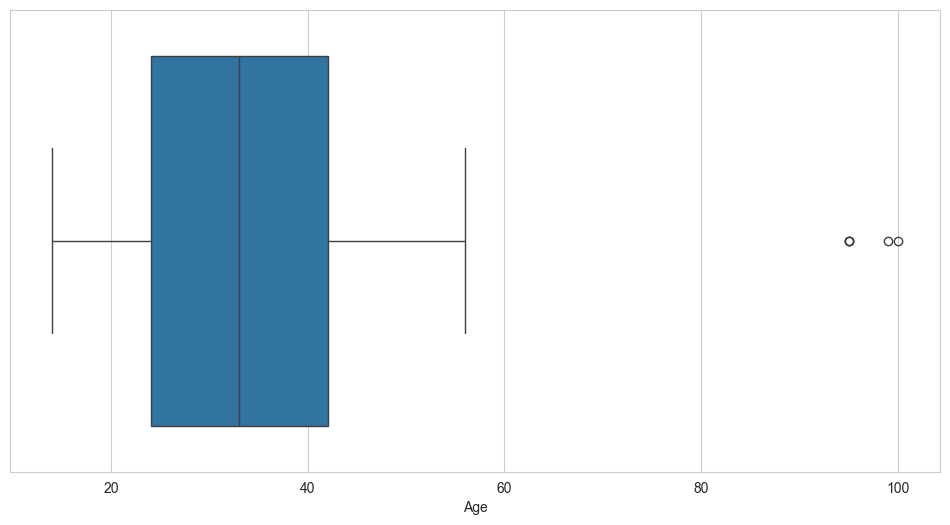

In [29]:
sns.boxplot(data= df, x= df.Age);

### Occupation

In [84]:
df.Occupation.value_counts()

Occupation
Other           7062
Lawyer          6575
Architect       6355
Engineer        6350
Scientist       6299
Mechanic        6291
Accountant      6271
Developer       6235
MediaManager    6232
Teacher         6215
Entrepreneur    6174
Doctor          6087
Journalist      6085
Manager         5973
Musician        5911
Writer          5885
Name: count, dtype: int64

In [81]:
df.Occupation.isna().sum()

7062

In [83]:
df.loc[pd.isna(df['Occupation']), 'Occupation'] = 'Other'

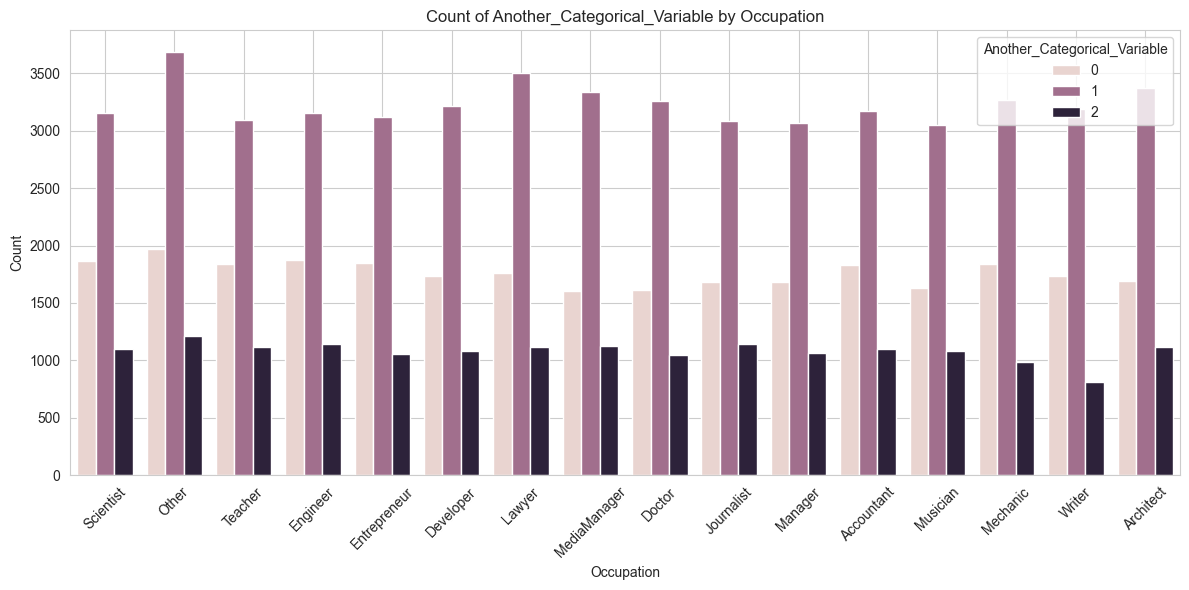

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Num_Bank_Accounts

In [34]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [35]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

21

In [36]:
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)

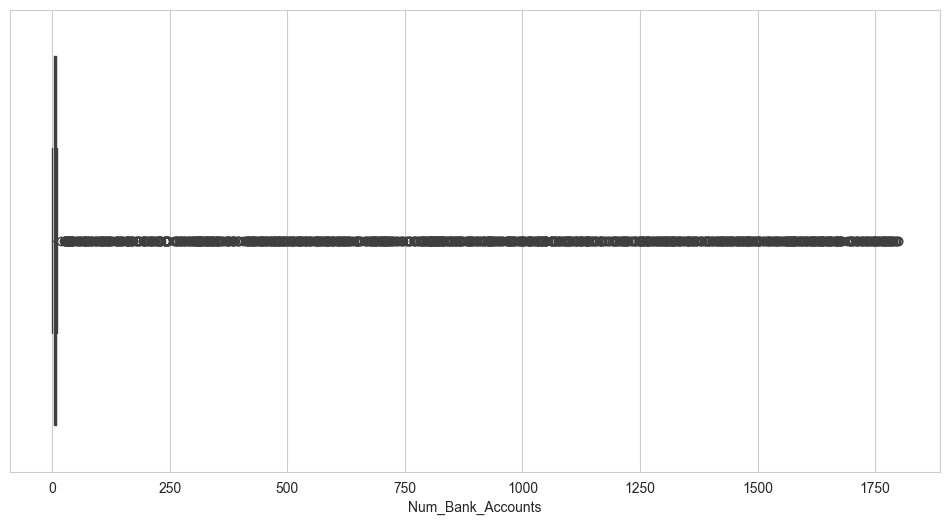

In [37]:
sns.boxplot(data= df, x = df.Num_Bank_Accounts);

### Num_of_Loan

In [38]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [39]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100], dtype=int64)

In [40]:
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352, 1017,  945,  146,  563,  341,  720, 1485,
         49,  737, 1106,  466,  728,  313,  597,  119,  663,  640,   92,
       1019,  501, 1302,   39,  716,  848,  931, 1214,  186,  424, 1001,
       1110, 1152,  457, 1433, 1187,   52, 1480, 1047, 1035, 1347,   33,
        193,  699,  329, 1451,  484,  649,  995,  545,  684, 1135, 1094,
       1204,  654,   58,  348,  614, 1363,  323, 1406, 1348,  430,  153,
       1461,  905, 1312, 1424, 1154,   95, 1353, 1228,  819, 1006,  795,
        359, 1209,  590,  696, 1185, 1465,  911,   70,  816, 1369,  143,
       1416,  455,   55, 1096, 1474,  420,  904,   89, 1259,  527, 1241,
        449,  983,  418,  319,   23,  238,  638,  138,  235,  280, 1070,
       1484,  274,  494, 1459,  404, 1354, 1495, 1391,  601, 1313, 1319,
        898,  231,  752,  174,  961, 1046,  834,  284,  438,  288, 1463,
       1151,  719,  198, 1015,  855,  841,  392, 14

In [41]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() # cannot be negative, dropping them

3770

In [42]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.shape

(93433, 20)

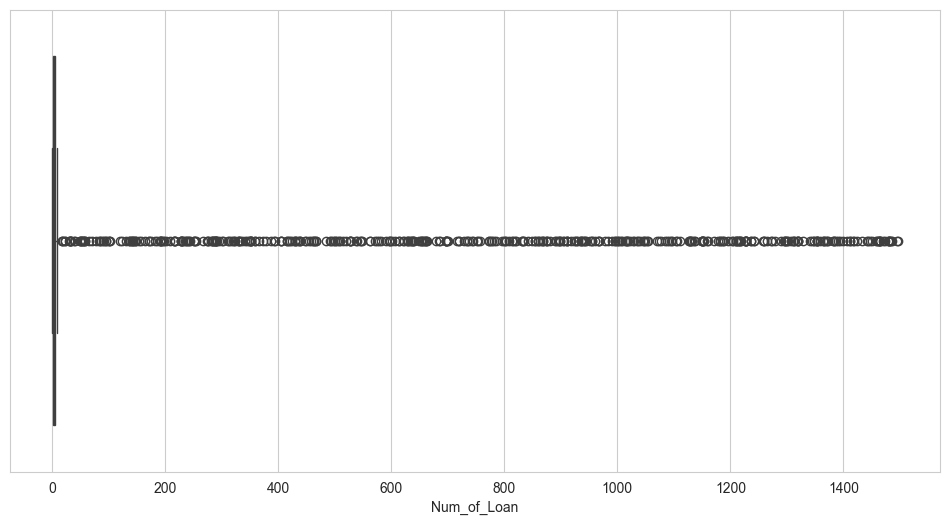

In [43]:
sns.boxplot(data= df, x = df.Num_of_Loan);

### Delay_from_due_date

In [44]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [45]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()  # not possible

array([-1, -2, -3, -5, -4], dtype=int64)

In [46]:
df['Num_of_Loan'].nunique()

398

In [47]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()

547

In [48]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
df.shape

(92886, 20)

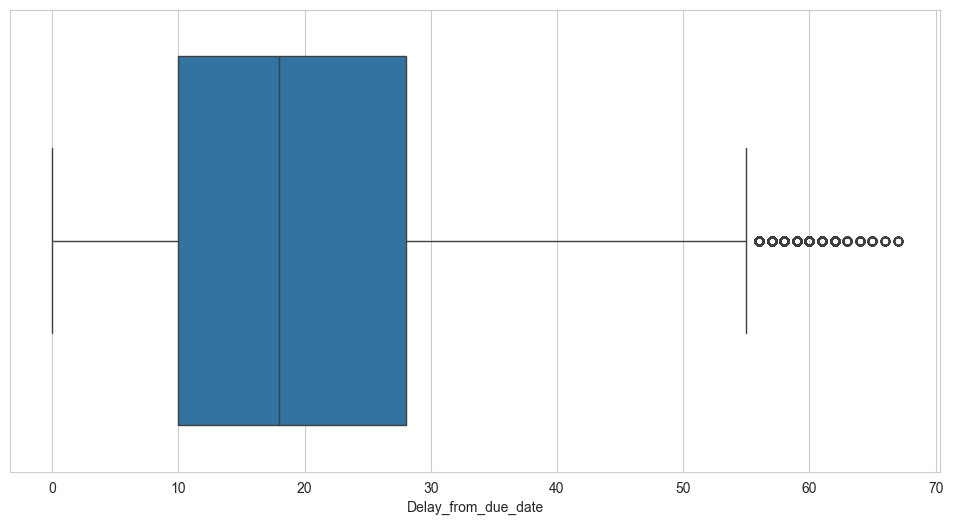

In [50]:
sns.boxplot(data= df, x = df.Delay_from_due_date);

### Num_of_Delayed_Payment

In [51]:
non_numeric_values(df, 'Num_of_Delayed_Payment')

{'-', 'nan'}

In [52]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [53]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

592

In [54]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.shape

(92294, 20)

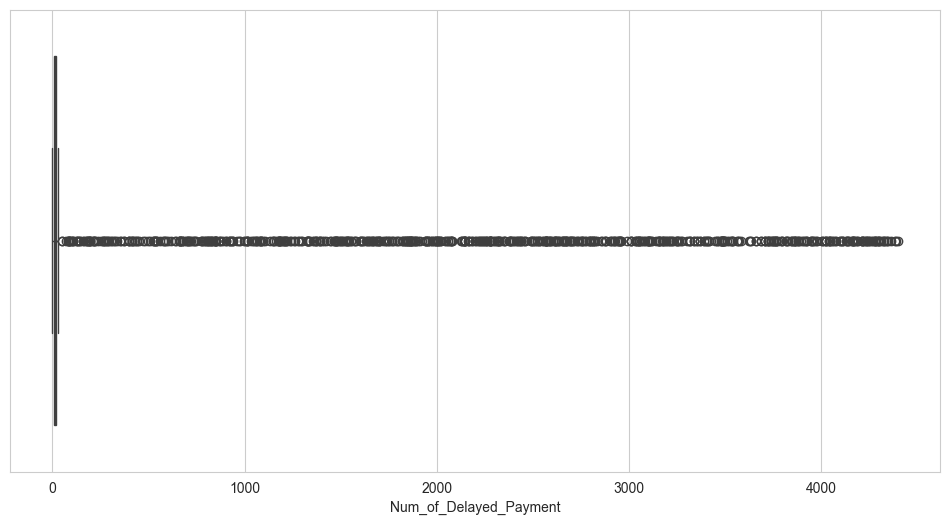

In [55]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment'].dropna());

In [56]:
df['Num_of_Delayed_Payment'].value_counts().head(10)

Num_of_Delayed_Payment
17.000    5080
19.000    5065
16.000    4951
10.000    4941
15.000    4888
18.000    4876
20.000    4761
12.000    4717
9.000     4617
8.000     4518
Name: count, dtype: int64

In [61]:
from sklearn.impute import KNNImputer

def knn_impute_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """

    # Extract the column to be imputed
    column_to_impute = df[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    df[column_name] = column_imputed

    return df


In [60]:
from sklearn.impute import KNNImputer


In [59]:
pip install scikit-learn


                                              0.0/11.0 MB ? eta -:--:--
                                             0.0/11.0 MB 960.0 kB/s eta 0:00:12
                                              0.2/11.0 MB 2.3 MB/s eta 0:00:05
     --                                       0.8/11.0 MB 6.0 MB/s eta 0:00:02
     ------                                   1.8/11.0 MB 11.3 MB/s eta 0:00:01
     ------                                   1.8/11.0 MB 11.3 MB/s eta 0:00:01
     --------                                 2.5/11.0 MB 9.2 MB/s eta 0:00:01
     -------------                            3.7/11.0 MB 12.4 MB/s eta 0:00:01
     --------------                           3.9/11.0 MB 12.5 MB/s eta 0:00:01
     --------------                           3.9/11.0 MB 12.5 MB/s eta 0:00:01
     --------------------                     5.7/11.0 MB 12.5 MB/s eta 0:00:01
     -----------------------                  6.4/11.0 MB 12.8 MB/s eta 0:00:01
     ---------------------------              7.5/1


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
df = knn_impute_column(df, 'Num_of_Delayed_Payment')

# to specify the number of neighbors:
# df = knn_impute_column(df, 'Num_of_Delayed_Payment', n_neighbors=10)

In [65]:
df['Num_of_Delayed_Payment'].isna().sum()

0

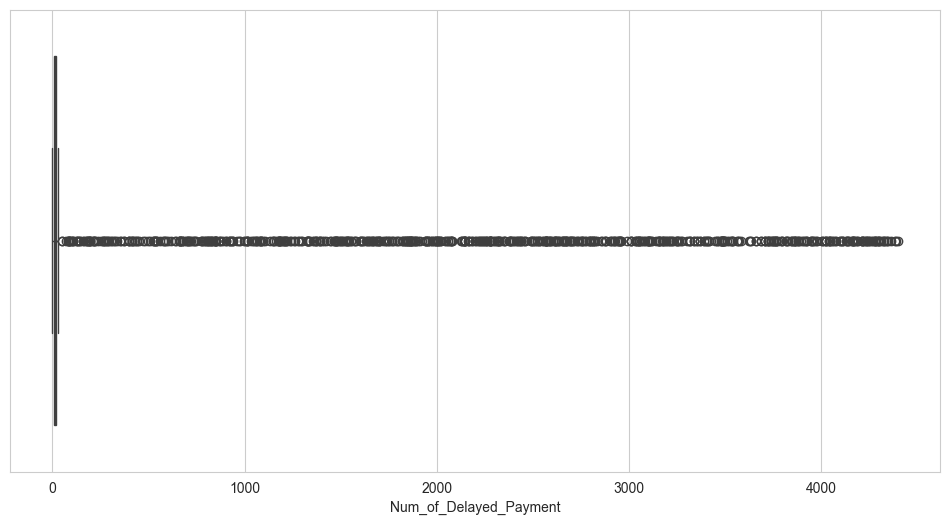

In [66]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment']);

### Num_Credit_Inquiries

In [67]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [68]:
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

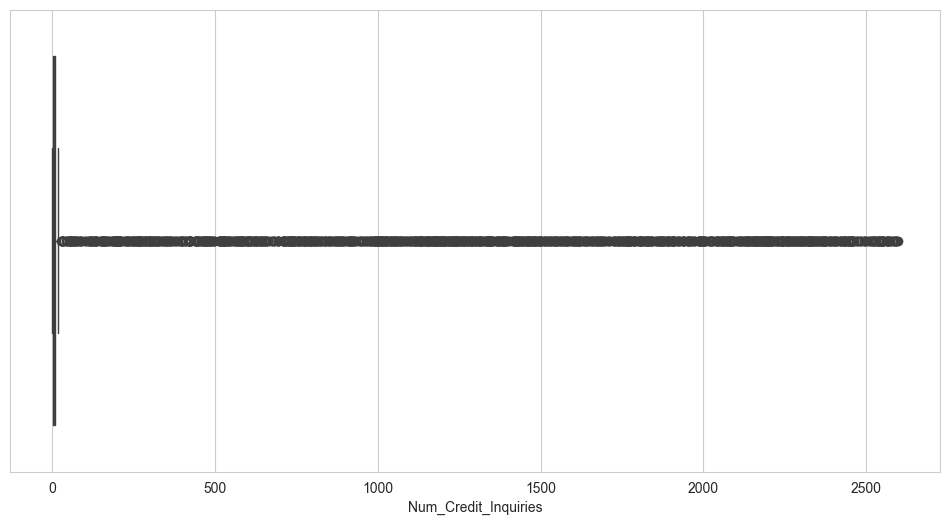

In [69]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries'].dropna());

In [70]:
df['Num_Credit_Inquiries'].isna().sum()

1810

In [71]:
df['Num_Credit_Inquiries'].nunique()

1160

In [72]:
df['Num_Credit_Inquiries'].value_counts().head(10)

Num_Credit_Inquiries
4.000    10314
3.000     8103
6.000     7560
7.000     7516
8.000     7311
2.000     7290
1.000     6889
0.000     6364
5.000     5277
9.000     4932
Name: count, dtype: int64

In [73]:
df = knn_impute_column(df, 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'].isna().sum()

0

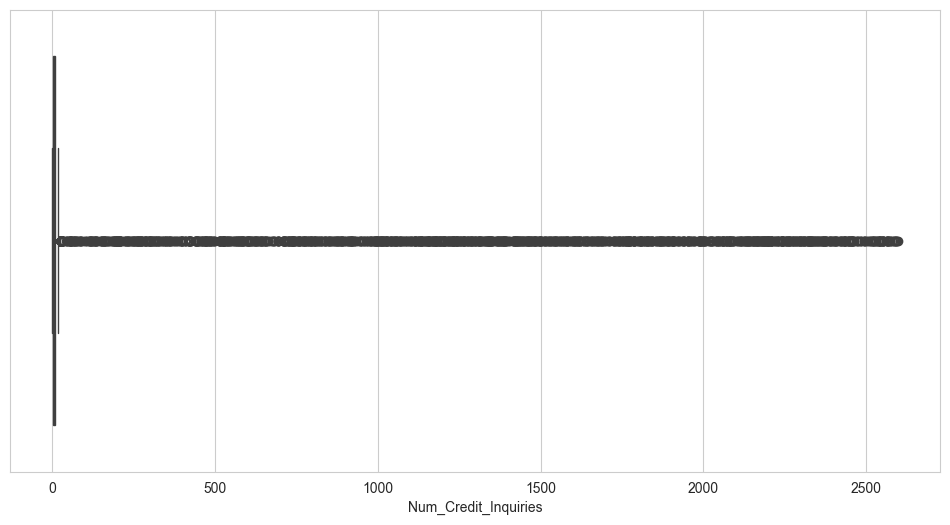

In [74]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries']);

### Credit_Mix

In [88]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64

In [86]:
df.Credit_Mix.isna().sum()

20195

In [87]:
df['Credit_Mix'].fillna('Unknown', inplace=True)

df['Credit_Mix'].astype('object')

0        Unknown
1           Good
2           Good
3           Good
4           Good
          ...   
99995    Unknown
99996    Unknown
99997       Good
99998       Good
99999       Good
Name: Credit_Mix, Length: 100000, dtype: object

In [78]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    34131
Good        21741
Unknown     18667
Bad         17755
Name: count, dtype: int64

### Credit_History_Age

In [99]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 5 Months     3762
30 Years and 2 Months     2454
15 Years and 9 Months     2256
13 Years and 8 Months     1985
15 Years and 11 Months     446
                          ... 
0 Years and 3 Months        20
0 Years and 2 Months        15
33 Years and 7 Months       14
33 Years and 8 Months       12
0 Years and 1 Months         2
Name: count, Length: 404, dtype: int64

In [95]:
df['Credit_History_Age'].isna().sum()

0

In [92]:
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [96]:
df['Credit_History_Age'].isna().sum()

0

In [98]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 5 Months     3762
30 Years and 2 Months     2454
15 Years and 9 Months     2256
13 Years and 8 Months     1985
15 Years and 11 Months     446
                          ... 
0 Years and 3 Months        20
0 Years and 2 Months        15
33 Years and 7 Months       14
33 Years and 8 Months       12
0 Years and 1 Months         2
Name: count, Length: 404, dtype: int64

In [100]:
# Trích xuất số năm và tháng từ cột 'Credit_History_Age'
df['Credit_History_Years'] = pd.to_numeric(df['Credit_History_Age'].str.extract(r'(\d+) Years')[0], errors='coerce').fillna(0).astype(int)
df['Credit_History_Months'] = pd.to_numeric(df['Credit_History_Age'].str.extract(r'(\d+) Months')[0], errors='coerce').fillna(0).astype(int)

# Xóa cột gốc 'Credit_History_Age'
df.drop(columns=['Credit_History_Age'], inplace=True)


In [102]:
# Convert years to months and add with months to get total months
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df.head(10)

KeyError: 'Credit_History_Years'

In [103]:
df.head(10)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7,4.000,Unknown,809.98,26.823,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2,265
1,23,Scientist,19114.12,3,4,3,4,-1,NaN,4.000,Good,809.98,31.945,No,49.575,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,2,362
2,-500,Scientist,19114.12,3,4,3,4,3,7,4.000,Good,809.98,28.609,No,49.575,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,2,267
3,23,Scientist,19114.12,3,4,3,4,5,4,4.000,Good,809.98,31.378,No,49.575,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2,268
4,23,Scientist,19114.12,3,4,3,4,6,NaN,4.000,Good,809.98,24.797,No,49.575,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2,269
5,23,Scientist,19114.12,3,4,3,4,8,4,4.000,Good,809.98,27.262,No,49.575,62.430172331195294,!@9#%8,340.4792117872438,2,270
6,23,Scientist,19114.12,3,4,3,4,3,8,4.000,Good,809.98,22.538,No,49.575,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,2,271
7,23,Scientist,19114.12,3,4,3,4,3,6,4.000,Good,809.98,23.934,No,49.575,24.785216509052056,HighspentMediumvaluepayments,358.12416760938714,1,362
8,28,Other,34847.84,2,4,6,1,3,4,2.000,Good,605.03,24.464,No,18.816,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,1,319
9,28,Teacher,34847.84,2,4,6,1,7,1,2.000,Good,605.03,38.551,No,18.816,40.39123782853101,HighspentLargevaluepayments,484.5912142650067,2,320


### Payment_of_Min_Amount

In [ ]:
df.Payment_of_Min_Amount.value_counts()

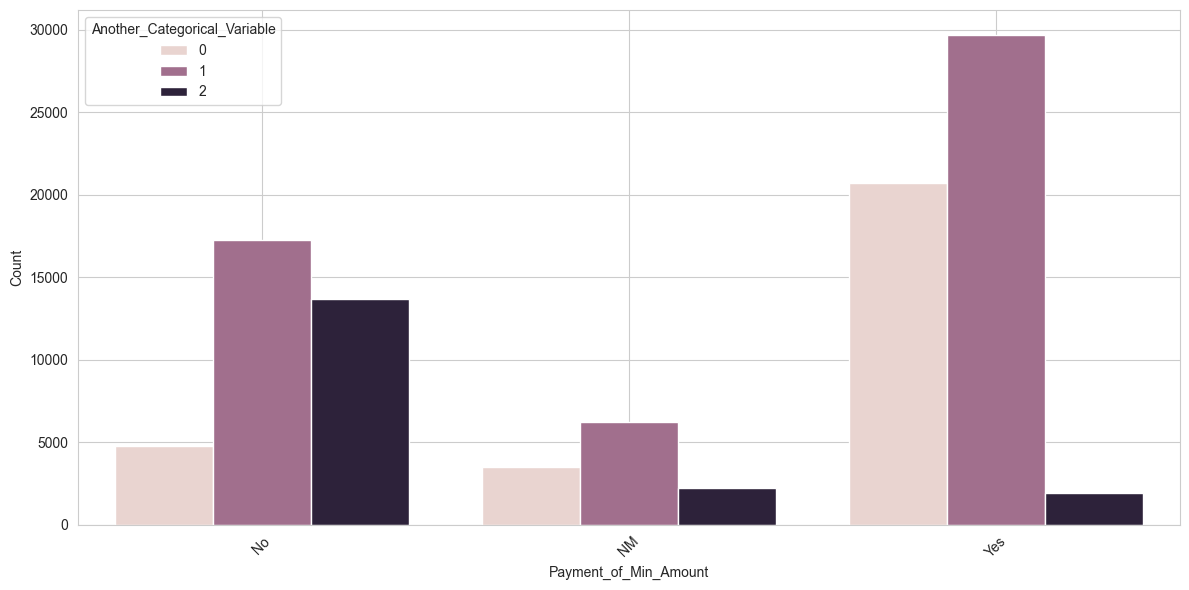

In [104]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Amount_invested_monthly

In [105]:
df.Amount_invested_monthly.nunique()

91049

In [106]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [108]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()

array([], dtype=float64)

In [109]:
df.Amount_invested_monthly.value_counts().head(15)

Amount_invested_monthly
10000.000    4305
0.000         169
80.415          1
36.662          1
89.738          1
59.937          1
165.181         1
62.031          1
215.577         1
44.611          1
195.594         1
131.028         1
189.419         1
90.654          1
219.027         1
Name: count, dtype: int64

In [111]:
df[df.Amount_invested_monthly.isna()].sample(15)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
38164,15,Journalist,19357.89,8,10,15,6,40,23,7.000,Bad,4064.81,26.548,NM,90.724,NaN,LowspentSmallvaluepayments,152.88582887965006,0,131
83897,45,Teacher,93305.76,3,6,15,1,14,19,3.000,Standard,1275.86,40.652,Yes,39.386,NaN,HighspentLargevaluepayments,919.4186877896127,1,356
34730,39,Journalist,21139.23,5,5,7,4,21,10,4.000,Standard,298.5,28.411,No,66.903,NaN,HighspentLargevaluepayments,296.77499791034586,1,377
78699,14,Mechanic,31273.54,5,5,20,2,14,12,8.000,Standard,2382.3,33.501,Yes,49.940,NaN,LowspentSmallvaluepayments,395.51105118502977,1,104
38511,22,Musician,40762.39,4,5,1,1,9,8,9.000,Good,1212.17,34.135,No,24.237,NaN,HighspentMediumvaluepayments,480.75592239094993,2,302
32901,29,Doctor,16440.63,3,3,28,7,22,13,6.000,Standard,1946.81,23.899,Yes,47.992,NaN,LowspentSmallvaluepayments,210.7028772276429,0,114
61200,25,Teacher,32030.69,4,4,6,4,19,13,3.000,Standard,625.84,30.883,No,86.146,NaN,LowspentSmallvaluepayments,310.5006249066013,1,233
36116,24,Scientist,170751.96,3,4,6,4,10,2,7.000,Good,1076.56,25.584,No,443.105,NaN,!@9#%8,NaN,2,392
8023,34,Other,3544929.0,8,9,30,6,54,24,8.000,Bad,2867.66,38.819,Yes,43.235,NaN,LowspentSmallvaluepayments,234.10001980801397,0,143
42593,23,Scientist,15937.74,94,9,33,3,25,22,7.000,Bad,2432.09,35.838,Yes,38.418,NaN,LowspentSmallvaluepayments,240.14279726448987,0,149


In [112]:
df = knn_impute_column(df, 'Amount_invested_monthly')

NameError: name 'knn_impute_column' is not defined

In [113]:
df.Amount_invested_monthly.isna().sum()

4479

In [114]:
df.Amount_invested_monthly.value_counts().head(10)

Amount_invested_monthly
10000.000    4305
0.000         169
80.415          1
36.662          1
89.738          1
59.937          1
165.181         1
62.031          1
215.577         1
44.611          1
Name: count, dtype: int64

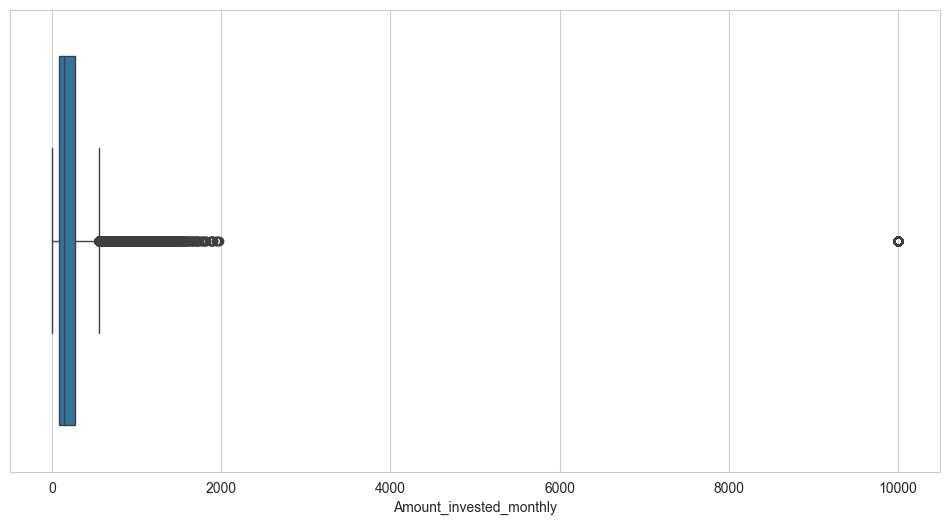

In [115]:
sns.boxplot(data= df, x = df['Amount_invested_monthly']);

In [116]:
df[df['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()

4305

### Payment_Behaviour

In [ ]:
df.Payment_Behaviour.value_counts()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)


In [ ]:
df.Payment_Behaviour.value_counts()

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

### Monthly_Balance

In [119]:
df.Monthly_Balance.isna().sum()

1200

In [120]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [121]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()

9

In [122]:
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [123]:
df['Monthly_Balance'].value_counts().head(15)

Monthly_Balance
312.494    1
270.911    1
254.971    1
250.093    1
289.755    1
260.626    1
606.830    1
111.991    1
299.545    1
559.541    1
604.340    1
347.414    1
589.699    1
486.017    1
281.884    1
Name: count, dtype: int64

In [124]:
df['Monthly_Balance'].max()

1602.0405189622518

In [125]:
df['Monthly_Balance'].min()

0.0077596647753352

In [126]:
df['Monthly_Balance'].mean()

402.5512581105154

In [127]:
df = knn_impute_column(df, 'Monthly_Balance')
df.Monthly_Balance.isna().sum()

NameError: name 'knn_impute_column' is not defined

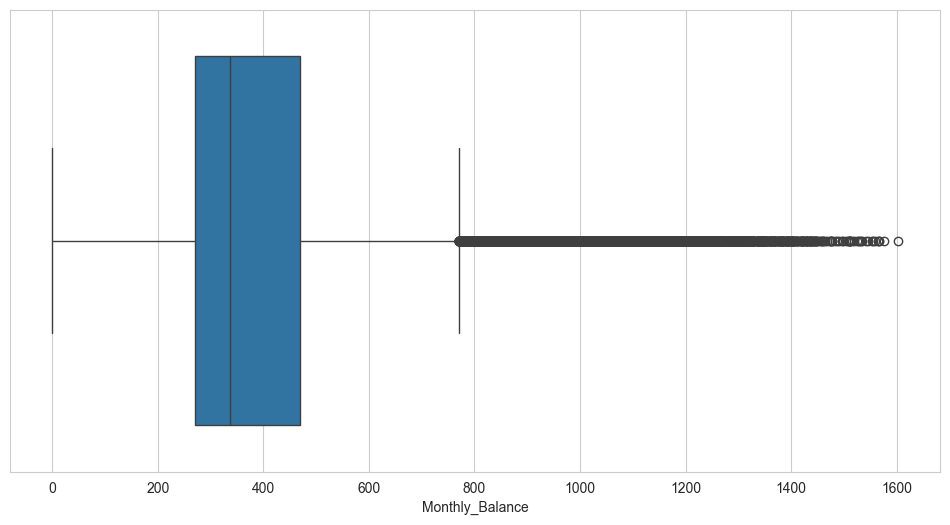

In [128]:
sns.boxplot(df, x= df['Monthly_Balance']);

In [130]:
=df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df.info()

SyntaxError: invalid syntax (2873789379.py, line 1)

# Visualisations

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

In [ ]:
sns.pairplot(df, corner=True);

# Save and read clean data

In [ ]:
df.to_csv("Creditscore_train_cleaned.csv", index=False)

In [ ]:
df = pd.read_csv('/kaggle/working/Creditscore_train_cleaned.csv')
df.head()